<a href="https://colab.research.google.com/github/haohe1113/Steam-Game-Rcmd-Engine/blob/master/Marketing_MDS_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv(r"C:\Users\justi\OneDrive\Documents\steam-200k.csv", header = None).drop(4,axis=1)
df.columns = ['user', 'game', 'action', 'hours']
df = df[df['action'] == 'play'].copy()

In [ ]:
game_list1 = df['game'].value_counts()[0:25].index.values.tolist()
game_list2 = df['game'].value_counts()[100:125].index.values.tolist()

game_list  = game_list1+game_list2

df = df[df['game'].isin(game_list)].copy()

In [ ]:
userbyitem = pd.DataFrame(index=df['user'].unique(), columns=df['game'].unique())

for i in range(len(df)):
    user = df.iloc[i]['user']
    game = df.iloc[i]['game']
    userbyitem.loc[user,game] = df.iloc[i]['hours']


In [ ]:
userbyitem.to_csv('userbyitem.csv', index=True)

In [ ]:
ubyi = pd.read_csv('userbyitem.csv', index_col=0)
ubyi.head()

,Dead Island Epidemic,Marvel Heroes 2015,Mirror's Edge,FTL Faster Than Light,HOARD,Amnesia The Dark Descent,The Witcher Enhanced Edition,Dungeon Defenders,TERA,Mafia II,...,Crash Time II,Rochard,Divinity Original Sin Enhanced Edition,Star Wars Dark Forces,Savage Lands,resident evil 4 / biohazard 4,Grim Dawn,CastleMiner Z,The Incredible Adventures of Van Helsing II,The LEGO Movie - Videogame
151603712,1.4,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53875128,NaN,NaN,23.0,9.7,1.4,0.4,0.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26122540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218323237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126340495,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\justi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\justi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



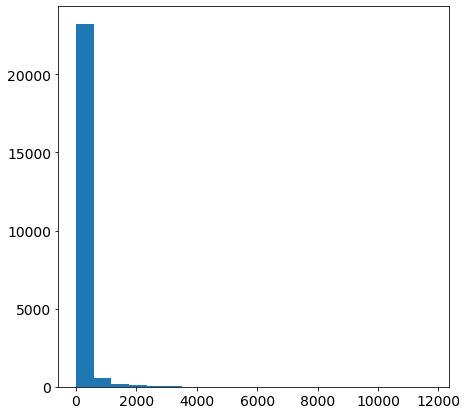

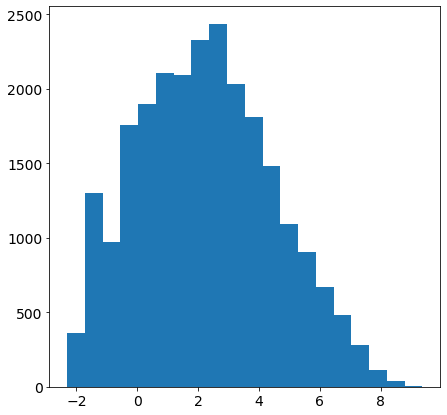

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

plt.hist(ubyi.values.flatten(), bins=20)
plt.show()

plt.hist(np.log(ubyi.values.flatten()), bins=20)
plt.show()

In [ ]:
#log transform the data
ubyi_norm = np.log(ubyi)
#add the absolute value of the min value so that the data goes to an all positive scale
#this essentially turns the data into a 0 to 10 scale
ubyi_norm += abs(ubyi_norm.min().min())
print(ubyi_norm.min().min(), ubyi_norm.max().max())
#take out users that haven't rated at least 3 games
ubyi_norm = ubyi_norm[(~ubyi_norm.isnull()).sum(axis=1) >= 3]
ubyi_norm

0.0 10.366592440090706


,Dead Island Epidemic,Marvel Heroes 2015,Mirror's Edge,FTL Faster Than Light,HOARD,Amnesia The Dark Descent,The Witcher Enhanced Edition,Dungeon Defenders,TERA,Mafia II,...,Crash Time II,Rochard,Divinity Original Sin Enhanced Edition,Star Wars Dark Forces,Savage Lands,resident evil 4 / biohazard 4,Grim Dawn,CastleMiner Z,The Incredible Adventures of Van Helsing II,The LEGO Movie - Videogame
53875128,NaN,NaN,5.438079,4.574711,2.639057,1.386294,0.693147,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97298878,NaN,NaN,1.609438,NaN,NaN,NaN,NaN,NaN,NaN,5.068904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65117175,NaN,NaN,NaN,2.995732,NaN,3.496508,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11373749,NaN,NaN,NaN,NaN,NaN,NaN,6.327937,3.135494,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56038151,NaN,NaN,1.098612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42657809,NaN,1.94591,NaN,NaN,NaN,NaN,4.787492,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87201181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116564064,NaN,NaN,5.480639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34901647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.7612,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

ubyi_norm = ubyi.T
ubyi_norm.columns = [str(col) + '_id' for col in ubyi_norm.columns]

ubyi_norm.columns


Index(['151603712_id', '53875128_id', '26122540_id', '218323237_id',
       '126340495_id', '97298878_id', '233558010_id', '48845802_id',
       '65117175_id', '236557903_id',
       ...
       '116564064_id', '34901647_id', '191721546_id', '304834885_id',
       '161896440_id', '135400225_id', '131377772_id', '88705345_id',
       '125424716_id', '99096740_id'],
      dtype='object', length=1678)

In [ ]:
#construct user correlation matrix
user_corr = pd.DataFrame(index=ubyi_norm.index.values, 
                         columns=ubyi_norm.index.values)


In [ ]:
import numpy as np 
i = 0
for user1 in user_corr.index.values:
  #progress indicator
    i+=1
    if(i%50 == 0):
        print(i)
    for user2 in user_corr.columns.values:
        if user1 == user2:
            continue
        if not np.isnan(user_corr.loc[user1, user2]):
      #if the matrix value is already filled out, we don't need to calculate again
            continue
    #calculation correlation between two user vectors
        a = ubyi_norm.loc[user1].values
        b = ubyi_norm.loc[user2].values
        empty = ~np.logical_or(np.isnan(a), np.isnan(b))
        a=np.compress(empty,a)
        b=np.compress(empty,b)
        if(len(a) < 5):
      #if users have less than 5 items in common, just leave it NA
      #pearson similarity doesn't have much meaning in those cases
            continue
        corr = np.corrcoef(a,b)[0,1]
        user_corr.loc[user1,user2] = corr
        user_corr.loc[user2,user1] = corr

50


In [ ]:
np.fill_diagonal(user_corr.values, 0)
user_corr.fillna(0)

,Dead Island Epidemic,Marvel Heroes 2015,Mirror's Edge,FTL Faster Than Light,HOARD,Amnesia The Dark Descent,The Witcher Enhanced Edition,Dungeon Defenders,TERA,Mafia II,...,Crash Time II,Rochard,Divinity Original Sin Enhanced Edition,Star Wars Dark Forces,Savage Lands,resident evil 4 / biohazard 4,Grim Dawn,CastleMiner Z,The Incredible Adventures of Van Helsing II,The LEGO Movie - Videogame
Dead Island Epidemic,0.000000,0.853338,-0.246074,0.569988,0.000000,0.885917,0.000000,0.853400,0.029558,0.896731,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.000000,0
Marvel Heroes 2015,0.853338,0.000000,0.000000,0.000000,0.000000,0.000000,-0.172275,-0.296055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.000000,0
Mirror's Edge,-0.246074,0.000000,0.000000,0.004374,0.000000,-0.238448,-0.147787,0.175228,0.321335,0.234588,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.000000,0
FTL Faster Than Light,0.569988,0.000000,0.004374,0.000000,0.885116,0.011172,0.144394,-0.094952,-0.289313,0.074836,...,0.000000,-0.663288,-0.234045,-0.264555,0,0.000000,0,0,0.000000,0
HOARD,0.000000,0.000000,0.000000,0.885116,0.000000,-0.477210,0.000000,-0.178924,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.000000,0
Amnesia The Dark Descent,0.885917,0.000000,-0.238448,0.011172,-0.477210,0.000000,0.420565,-0.331457,0.000000,-0.205757,...,0.000000,0.000000,0.000000,0.000000,0,-0.933094,0,0,0.000000,0
The Witcher Enhanced Edition,0.000000,-0.172275,-0.147787,0.144394,0.000000,0.420565,0.000000,0.107231,0.000000,-0.006140,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.000000,0
Dungeon Defenders,0.853400,-0.296055,0.175228,-0.094952,-0.178924,-0.331457,0.107231,0.000000,0.000000,0.303115,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.868177,0
TERA,0.029558,0.000000,0.321335,-0.289313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.000000,0
Mafia II,0.896731,0.000000,0.234588,0.074836,0.000000,-0.205757,-0.006140,0.303115,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0.000000,0


In [ ]:
ubyi = ubyi.fillna(0)
ubyi = ubyi.T
test = ubyi.head()

In [ ]:
user_corr = user_corr.fillna(0)

In [ ]:
ubyi

,151603712,53875128,26122540,218323237,126340495,97298878,233558010,48845802,65117175,236557903,...,116564064,34901647,191721546,304834885,161896440,135400225,131377772,88705345,125424716,99096740
Dead Island Epidemic,1.4,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0.0,0.0,0.0
Marvel Heroes 2015,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mirror's Edge,0.0,23.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FTL Faster Than Light,0.0,9.7,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
HOARD,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amnesia The Dark Descent,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,3.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Witcher Enhanced Edition,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0
Dungeon Defenders,0.0,0.0,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TERA,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.4,0.0,0.0,0.0,4.9,0.0,0.0
Mafia II,0.0,0.0,0.0,0.0,0.0,15.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(ubyi)
embedding = MDS(n_components=2, dissimilarity='euclidean')
X_transformed = embedding.fit_transform(X_scaled)
X_transformed

array([[ 7.30677825e+00, -5.93375360e-01],
       [-2.40887355e+00,  8.94710908e+00],
       [-5.10227019e+00,  6.43242721e-01],
       [-6.34013283e+00,  4.33651032e+00],
       [-3.08354018e-01,  8.90468957e-02],
       [ 2.88190602e-01, -6.29163994e+00],
       [-7.85771785e+00,  1.99288370e+00],
       [ 7.12736485e+00,  2.96656492e+00],
       [ 7.21962008e+00,  6.88756566e+00],
       [ 9.77861602e+00,  1.47352959e-01],
       [-2.99040608e+00,  4.67603995e+00],
       [ 1.62148076e+00, -1.39305244e+00],
       [ 6.85584091e+00, -5.94794438e+00],
       [-3.35303978e-01,  8.81923314e-01],
       [-7.00984788e+00,  7.73842957e+00],
       [ 4.62221305e+00,  3.90115899e+00],
       [-7.96256236e+00, -5.00447312e+00],
       [ 2.86156114e+00, -7.75782892e+00],
       [-1.58949906e+00, -3.24531457e-01],
       [ 3.15866089e+00,  7.99008736e+00],
       [-3.94559443e+00, -5.60114635e+00],
       [-5.90199757e+00, -3.03058128e+00],
       [ 6.50556483e-01,  2.62397180e-01],
       [ 6.

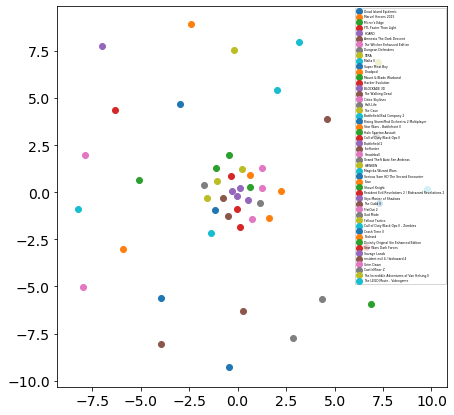

In [ ]:
import matplotlib.pyplot as plt

colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# print(data.target)
for i in range(len(ubyi.index)):
    subset = X_transformed[i]
  # subset = X_scaled[data.target == i]
    x = subset[0]
    y = subset[1]
    plt.scatter(x,y, label= ubyi.index[i])
# plt.xlim(-0.9, 0.9)
# plt.ylim(-0.9, 0.9)
plt.legend(loc=1, prop={'size': 3})
plt.show()
